## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset


*   Reference for [Topic modeling ](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.

 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

The important libraries used to perform the Topic Modeling are: Pandas, Gensim, pyLDAvis

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents.


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

## Data Understanding
### Loading necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en)

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#data loader class
class DataLoader:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name


  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df



In [4]:
#object creation
DataLoader_obj= DataLoader('drive/MyDrive','cleaned_fintech_data.csv')


In [5]:
tweets_df=DataLoader_obj.read_csv()
tweets_df.dropna()


,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp


In [6]:
len(tweets_df)

5621

In [7]:
tweets_df.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [8]:
class PrepareData:
  def __init__(self,df):
    self.df=df

  def preprocess_data(self):
    tweets_df = self.df.loc[self.df['lang'] =="en"]


    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return tweets_df,word_list, word_to_id, corpus_1


In [9]:
PrepareData_obj=PrepareData(tweets_df)
df,word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [ ]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(29, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 2), (57, 1)], [(58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(29, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1),

In [ ]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [ ]:
print(id_words)

[[('babies', 1), ('baby', 1), ('becoming', 1), ('birth', 1), ('bundles', 1), ('burden', 1), ('coz', 1), ('douglas', 1), ('expensiveturn', 1), ('formula', 1), ('forth', 1), ('gave', 1), ('giving', 2), ('handmpesa', 1), ('hard', 1), ('joy', 1), ('kenya', 1), ('life', 1), ('meeting', 1), ('mother', 1), ('needs', 1), ('nutritional', 1), ('nyaoko', 1), ('tears', 1), ('this', 1), ('time', 1)], [('all', 1), ('away', 1), ('brings', 1), ('carbon', 1), ('combat', 1), ('critical', 1), ('day', 1), ('degraded', 1), ('food', 1), ('helps', 1), ('jobs', 1), ('land', 1), ('lifting', 1), ('locking', 1), ('many', 1), ('poverty', 1), ('recover', 1), ('restoring', 1), ('security', 1), ('slows', 1), ('today', 1), ('world', 1)], [('carbon', 1), ('confident', 1), ('delivered', 1), ('emissions', 1), ('g7', 1), ('hearing', 2), ('like', 1), ('reducing', 1), ('s', 2), ('say', 2), ('vaccines', 1)], [('account', 1), ('across', 1), ('airtime', 1), ('arteta', 1), ('buy', 1), ('even', 1), ('fuliza', 1), ('kabando', 1)

### Topic Modeling using Latent Dirichlet Allocation
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined.

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics
which covers a good deal of the words in the tweet



In [95]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
pprint(lda_model.print_topics())

[(0,
  '0.035*"carbon" + 0.024*"climate" + 0.024*"gt" + 0.014*"bp" + 0.013*"change" '
  '+ 0.010*"future" + 0.010*"land" + 0.009*"large" + 0.008*"intense" + '
  '0.008*"focus"'),
 (1,
  '0.025*"money" + 0.018*"account" + 0.015*"like" + 0.014*"ur" + 0.014*"june" '
  '+ 0.013*"follow" + 0.013*"giveaway" + 0.013*"giving" + 0.013*"would" + '
  '0.013*"rt"'),
 (2,
  '0.024*"carbon" + 0.017*"nt" + 0.016*"i" + 0.014*"meat" + 0.013*"uk" + '
  '0.011*"footprint" + 0.009*"s" + 0.009*"go" + 0.009*"low" + 0.009*"great"'),
 (3,
  '0.043*"carbon" + 0.026*"tax" + 0.025*"protecting" + 0.025*"rights" + '
  '0.025*"amp" + 0.021*"oil" + 0.021*"emissions" + 0.016*"new" + 0.014*"the" + '
  '0.013*"covid"'),
 (4,
  '0.032*"government" + 0.030*"carbon" + 0.025*"s" + 0.023*"emissions" + '
  '0.023*"zero" + 0.018*"i" + 0.018*"net" + 0.017*"gas" + 0.016*"cost" + '
  '0.015*"target"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('carbon', 0.034708485),
   ('climate', 0.024370827),
   ('gt', 0.024116777),
   ('bp', 0.014439733),
   ('change', 0.012907533),
   ('future', 0.009547638),
   ('land', 0.009546835),
   ('large', 0.008649601),
   ('intense', 0.008456625),
   ('focus', 0.007898001)]),
 (1,
  [('money', 0.024699863),
   ('account', 0.017653052),
   ('like', 0.014913488),
   ('ur', 0.014439795),
   ('june', 0.014196563),
   ('follow', 0.013304844),
   ('giveaway', 0.013050717),
   ('giving', 0.013021249),
   ('would', 0.012878241),
   ('rt', 0.012542808)]),
 (2,
  [('carbon', 0.024277104),
   ('nt', 0.016590921),
   ('i', 0.01616982),
   ('meat', 0.014486317),
   ('uk', 0.013002311),
   ('footprint', 0.01136055),
   ('s', 0.009493683),
   ('go', 0.009141456),
   ('low', 0.008937165),
   ('great', 0.008675808)]),
 (3,
  [('carbon', 0.043205258),
   ('tax', 0.026049877),
   ('protecting', 0.025413383),
   ('rights', 0.02533519),
   ('amp', 0.02464682),
   ('oil', 0.021254148),
   ('emissions', 0.02

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Each line is a topic with individual topic terms and weights. Topic0  can be termed as climate change, and Topic4 can be termed as government and carbon emission.

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [99]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Lda model Coherence Score/Accuracy on Tweets: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.7493323903550815

 Lda model Coherence Score/Accuracy on Tweets:  0.6172103452083265


Basic Ldamodel Coherence Score 0.58 This means that the model has performed reasonably well in topic modeling.

In [100]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Anlayizing results**
Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [101]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.352920  0.012811       1        1  30.180597
2     -0.169380  0.168976       2        1  21.181291
1     -0.093829 -0.354380       3        1  19.827666
4      0.021438  0.075665       4        1  17.670582
0     -0.111148  0.096928       5        1  11.139865, topic_info=            Term        Freq        Total Category  logprob  loglift
364   government  446.000000   446.000000  Default  30.0000  30.0000
973          tax  622.000000   622.000000  Default  29.0000  29.0000
966   protecting  607.000000   607.000000  Default  28.0000  28.0000
971       rights  605.000000   605.000000  Default  27.0000  27.0000
50     emissions  821.000000   821.000000  Default  26.0000  26.0000
...          ...         ...          ...      ...      ...      ...
263      climate  214.649048   302.792623   Topic5  -3.7144   1.8506
558       future   84.091991   112.585439   Topic5  -4.6515   1.9028
29        carbon  305.699241  2210.981101   Topic5  -3.3608   0.2161
1752       large   76.182419   116.605865   Topic5  -4.7502   1.7690
37          land   84.084921   393.107358   Topic5  -4.6515   0.6524

[223 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
58        3  0.998081    account
1186      3  0.998124       accs
4157      5  0.987747     actual
951       1  0.996062    against
4319      5  0.982380  americans
...     ...       ...        ...
300       3  0.960880      would
1208      3  0.998124       xtra
277       2  0.988851       year
950       4  0.980489        you
373       4  0.997084       zero

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

# Sentiment Analysis

[Notebook reference](https://github.com/lazuxd/simple-imdb-sentiment-analysis/blob/master/sentiment-analysis.ipynb)

## Building a Sentiment Classifier using Scikit-Learn

<center><img src="https://raw.githubusercontent.com/lazuxd/simple-imdb-sentiment-analysis/master/smiley.jpg"/></center>
<center><i>Image by AbsolutVision @ <a href="https://pixabay.com/ro/photos/smiley-emoticon-furie-sup%C4%83rat-2979107/">pixabay.com</a></i></center>

> &nbsp;&nbsp;&nbsp;&nbsp;**Sentiment analysis**, an important area in Natural Language Processing, is the process of automatically detecting affective states of text. Sentiment analysis is widely applied to voice-of-customer materials such as product reviews in online shopping websites like Amazon, movie reviews or social media. It can be just a basic task of classifying the polarity of a text as being positive/negative or it can go beyond polarity, looking at emotional states such as "happy", "angry", etc.




>> ### Import required libraries

In [11]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,giving forth life becoming burden kenya this m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,today world day combat restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,hearing say s confident vaccines delivered lik...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00
5,5.0,Thu Jun 17 06:26:49 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Buy airtime across all networks from Mpesa eve...,buy airtime across networks mpesa even fuliza ...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,...,OmarLali_,12376,3134,3167,NaN,NaN,"iamsoniah, F_M_Networks",NaN,Kenya,2021-06-17 06:26:49+00:00
6,6.0,Thu Jun 17 06:26:50 +0000 2021,"<a href=""https://help.twitter.com/en/using-twi...",Today is World Day to Combat #Desertification ...,today world day combat restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,SustainTrends,299346,5930,159,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,NaN,2021-06-17 06:26:50+00:00


In [39]:

def label_sentiments_in_dataframe(df, sentiment_column='sentiment'):
    def label_sentiment(row):
        # Extracting polarity and subjectivity from the string
        parts = row[sentiment_column].split(',')
        polarity = float(parts[0].split('polarity=')[1])
        subjectivity = float(parts[1].split('subjectivity=')[1].rstrip(')'))

        # Detailed sentiment classification
        if polarity > 0.5 and subjectivity > 0.6:
            detailed_label = 'Strong Positive Opinion'
        elif 0.1 < polarity <= 0.5 and subjectivity > 0.6:
            detailed_label = 'Mild Positive Opinion'
        elif polarity > 0.5 and subjectivity < 0.4:
            detailed_label = 'Positive Fact'
        elif -0.1 <= polarity <= 0.1 and subjectivity > 0.6:
            detailed_label = 'Neutral Opinion'
        elif -0.1 <= polarity <= 0.1 and subjectivity < 0.4:
            detailed_label = 'Neutral Fact'
        elif -0.5 < polarity <= -0.1 and subjectivity > 0.6:
            detailed_label = 'Mild Negative Opinion'
        elif polarity < -0.5 and subjectivity > 0.6:
            detailed_label = 'Strong Negative Opinion'
        elif polarity < -0.5 and subjectivity < 0.4:
            detailed_label = 'Negative Fact'
        else:
            detailed_label = 'Negative Fact'

        # Mapping detailed categories to broader Positive, Neutral, Negative
        if 'Positive' in detailed_label:
            return 'Positive'
        elif 'Negative' in detailed_label:
            return 'Negative'
        elif 'Neutral' in detailed_label:
            return 'Neutral'
        else:
            return 'Unclassified'

    df['Label'] = df.apply(label_sentiment, axis=1)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
labeled_df = label_sentiments_in_dataframe(df, 'sentiment')
labeled_df = labeled_df[['clean_text','Label' ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
labeled_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_text,Label
0,giving forth life becoming burden kenya this m...,Negative
3,today world day combat restoring degraded land...,Positive
4,hearing say s confident vaccines delivered lik...,Positive
5,buy airtime across networks mpesa even fuliza ...,Neutral
6,today world day combat restoring degraded land...,Positive
...,...,...
5613,join webinar carbon credits waste management ...,Negative
5615,in latest episode podcast unilevers peter ter ...,Negative
5616,lambie voted against medivac carbon tax protec...,Negative
5618,welkin moon giveaway bc finally money u got ta...,Negative


>> ### Basic EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='count'>

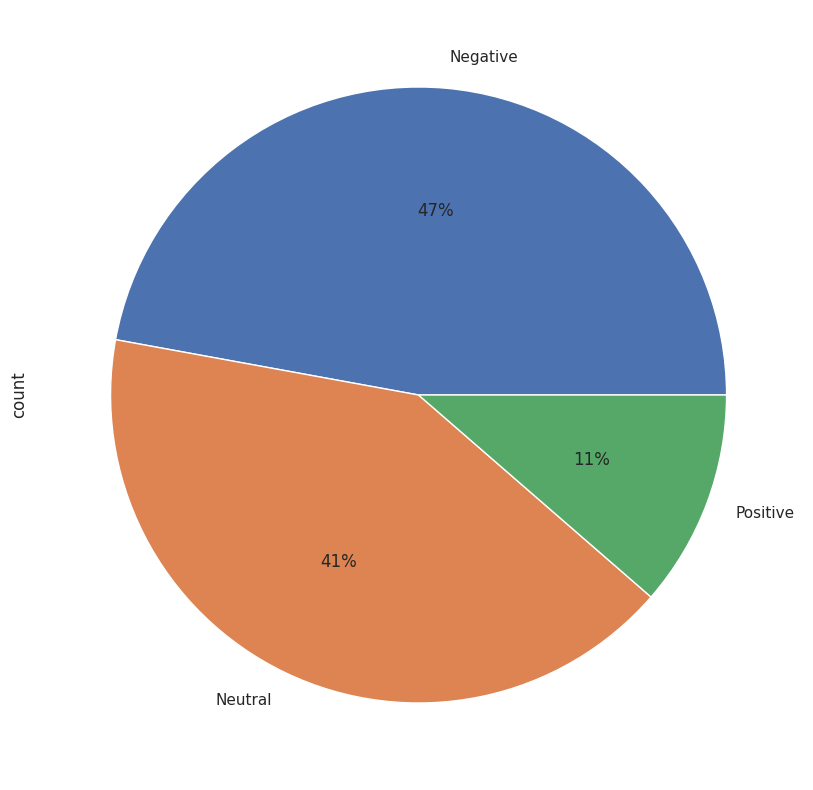

In [42]:
# Distribution of sentiments across all the tweets
sns.set(rc={'figure.figsize':(14,10)})
labeled_df.Label.value_counts().plot(kind='pie', autopct='%1.0f%%')

### Finetuning pretraiend huggingface models

In [61]:
!pip install -q transformers
!pip install wandb
!pip install emoji==0.6.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
labeled_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_text,Label
0,giving forth life becoming burden kenya this m...,Negative
3,today world day combat restoring degraded land...,Positive
4,hearing say s confident vaccines delivered lik...,Positive
5,buy airtime across networks mpesa even fuliza ...,Neutral
6,today world day combat restoring degraded land...,Positive


In [106]:
# filter positive and negative sentiments only
df = labeled_df[(labeled_df.Label == 'Positive') | (labeled_df.Label == 'Negative')]
target_map = { 'Positive': 1, 'Negative': 0}
df['target'] = df['Label'].map(target_map)
### select tweets only
texts = df['clean_text'].to_list()
labels = df['target'].to_list()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
# import required liabraries
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version inst

In [71]:
# create pipeline for sentiment analysis
classification = pipeline('sentiment-analysis')
type(classification)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

transformers.pipelines.text_classification.TextClassificationPipeline

In [72]:
predictions = classification(texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions ]
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]
# convert into numpy array
preds = np.array(preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


>> ### Evaluation

In [81]:
print("acc:", np.mean(df['target'] == preds))

acc: 0.6850551654964895


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


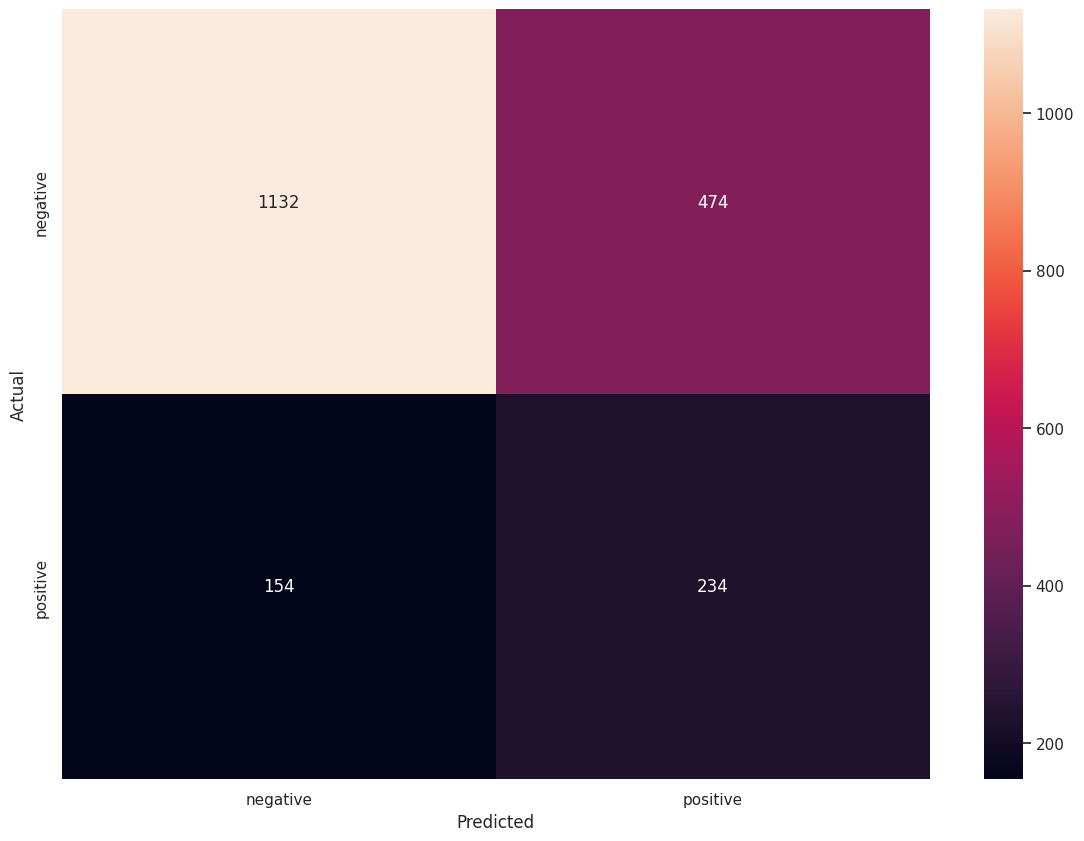

In [80]:
# calculate confusion matrix
cm = confusion_matrix(df['target'], preds)
# create function for plotting confusion matrix
def plot_cm(cm):
  classes = ['negative','positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

plot_cm(cm)

In [84]:
import wandb
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
wandb.init(project="sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
/usr/local/lib/python3.10/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [88]:
import wandb
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
wandb.init(project="sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
results = classifier(texts)
wandb.log({"predictions": results})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
def calculate_accuracy(predictions, true_labels):
    predicted_labels = []

    for prediction in predictions:
        if prediction['label'] == 'NEG':
            predicted_labels.append(0)
        elif prediction['label'] == 'POS':
            predicted_labels.append(1)


    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
    total_predictions = len(true_labels)

    accuracy = correct_predictions / total_predictions
    return accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
# Initialize wandb
wandb.init(project="sentiment-analysis")

# Load model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

# Watch the model to log its parameters
wandb.watch(model, log="all")

# Setup sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Perform sentiment analysis
results = classifier(texts)

# Log results
wandb.log({"predictions": results})


accuracy = calculate_accuracy(results, labels)
wandb.log({"accuracy": accuracy})

# Finish the run
wandb.finish()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
wandb: Currently logged in as: formahlet. Use `wandb login --relogin` to force relogin


accuracy,▁
accuracy,0.16048


## References

<sup>(1)</sup> &nbsp;[Sentiment Analysis - Wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis)  

<sup>(2)</sup> &nbsp;[Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)  
<sup>(3)</sup> &nbsp;[Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)  
<sup>(4)</sup> &nbsp;[Tf-idf - Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)  
<sup>(5)</sup> &nbsp;[TfidfTransformer - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)  
<sup>(6)</sup> &nbsp;[Stop words - Wikipedia](https://en.wikipedia.org/wiki/Stop_words)  
<sup>(7)</sup> &nbsp;[A list of English stopwords](https://gist.github.com/sebleier/554280)  
<sup>(8)</sup> &nbsp;[CountVectorizer - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
<sup>(9)</sup> &nbsp;[Scipy sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html)  
<sup>(10)</sup> [Compressed Sparse Row matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix)  
<sup>(11)</sup> [SGDClassifier - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  
<sup>(12)</sup> [RandomizedSearchCV - Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
<sup>(13)</sup> [Sentiment Classification using Document Embeddings trained with
Cosine Similarity](https://www.aclweb.org/anthology/P19-2057.pdf)  
<sup>(14)</sup> [Experimental Tracking and Mangemet tool](https://wandb.ai/home)
<sup>(15)</sup> [Huggingface](https://huggingface.co/)